# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

I would define the most profitable item to be the one that has the highest value in total sales after calculating the margin price from $State Bottle Retail-State Bottle Cost$ and multiplying by total number of bottles sold. The reason behind this would just be that even if you have a well-marketed super cool item that costs you nothing to make and sells for 1000 dollars, if you only sold 1, you aren't making as much as selling a million bottles of something with 1$ margins.

<Axes: xlabel='Profit', ylabel='Item Description'>

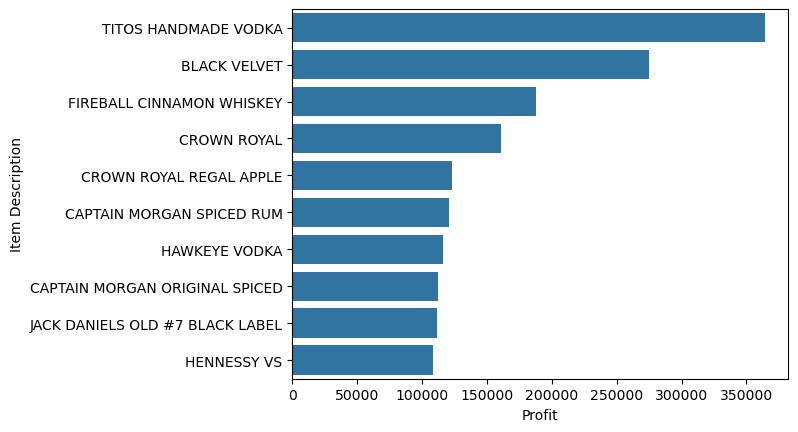

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

liquor_data = pd.read_csv("data/iowa.csv")
liquor_data['Profit'] = (liquor_data['State Bottle Retail'] - liquor_data['State Bottle Cost']) * liquor_data['Bottles Sold']
q1 = liquor_data.groupby("Item Description")['Profit'].sum()
sns.barplot(data=q1.reset_index().sort_values('Profit', ascending=False).head(10), x='Profit', y='Item Description', orient='h')



2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [4]:
x = np.array([1,3,5])
y = np.array([2,5])

In [5]:
x-y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

When subtracting the two vectors, we get an error that the operands could not be broadcast together because the shapes of the operands differ and we are trying to do an element-wise operation.

In [14]:
x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

We see after reshaping we get a result where we have the first element in x minus both elements in y (1-2 and 1-5 gives -1, -4), then second element in x minus both elements in y, etc.

In [12]:
x.reshape(1,-1) - y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

When swapping our reshaping on x and y, we see the result we get is the same values in the matrix, but transposed (so the rows are columns and columns are rows).

It can be noticed then that x.reshape(1,-1) makes x into a row vector (from simple list [x1, x2, x3] to [[x1, x2, x3]] row vector with outer [] denoting matrix). Similarly, x.reshape(-1,1) makes x into a column vector (to [[x1],[x2], [x3]] with commas acting as new row indicators).

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

<Axes: >

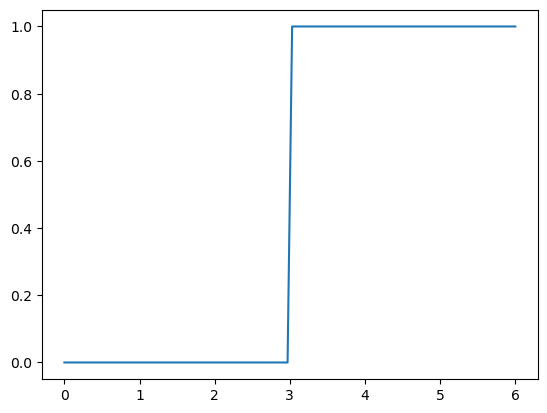

In [22]:
def indicator_function(x ,z):
    return (x<=z)

z_values = np.linspace(0,6,100)
y_values = [indicator_function(3, z) for z in z_values]

sns.lineplot(x=z_values, y=y_values)

$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ Because we know that $\mathbb{I}\{ x \le z \} = 1$ when x $\le$ z and = 0 when x > z from the definition of $\mathbb{I}\{ x \le z \}$ above. Therefore by definition $\mathbb{I}\{ x > z \}$ = 1 when x > z and = 0 when x $\le$ z. Therefore by subtracting $\mathbb{I}\{ x \le z \}$ from 1, we are essentially reversing it's behavior, when x $\le$ z the indicator is 1, thus 1-1=0 is the expression's value, and when x > z, it is 0, 1-0=1 is the expression's value. This is the exact same as $\mathbb{I}\{ x > z \}$.

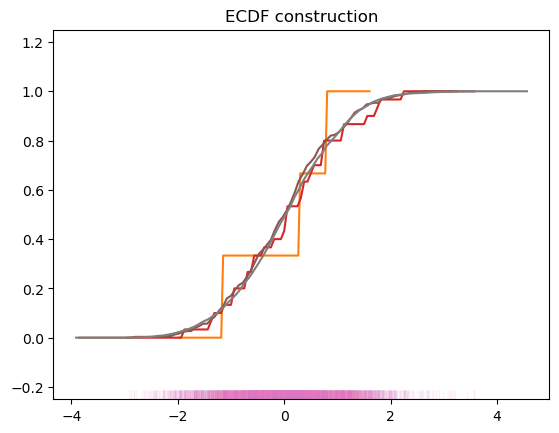

In [35]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    grid = np.linspace(X.min()-X.std(), X.max()+X.std(), 100)
    ecdf = 0*grid.copy()    
    fig = sns.rugplot(X,alpha=.1)
    fig.set(title='ECDF construction')
    for i in range(len(X)):
        F_i = indicator_function(X[i],grid)
        ecdf += F_i

    ecdf = ecdf/len(X)
    sns.lineplot(x=grid, y=ecdf)


As the sample size increases, we see the same start and end behavior (start at 0 and end at 1) due to the nature of ECDFs, however the main qualitative difference we see is that as the number of samples increases, the ECDF becomes smoother and smoother, because more observations means a smaller proportion of them fall under a given value (e.g. for sample of 2, minimum is 50% increase once there is an increase while for 1000, you have smaller increments).

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [56]:
def quantile(data, q):
    data = sorted(data)
    if not 0 <= q <= 1:
        raise ValueError("q must be between 0 and 1")
    pos = q * (len(data) - 1)
    lower = int(pos)
    upper = min(lower + 1, len(data) - 1)
    weight = pos - lower
    return data[lower] * (1 - weight) + data[upper] * weight

In [62]:
def iqr_and_whiskers(data):
    data = sorted(data)
    q3 = quantile(data, 0.75)
    q1 = quantile(data, 0.25)
    iqr = q3 - q1
    whisker_range = 1.5 * iqr
    lower = q1 - whisker_range
    upper = q3 + whisker_range
    whiskers = (lower, upper)
    return iqr, whiskers

In [60]:
def is_outlier(data):
    data = np.array(sorted(data))
    iqr, whiskers = iqr_and_whiskers(data)
    lower_bound, upper_bound = whiskers
    return (data < lower_bound) | (data > upper_bound)

In [58]:
def boxplot_summary(data):
    data = sorted(data)
    min_val = min(data)
    q1 = quantile(data, 0.25)
    median = quantile(data, 0.5)
    q3 = quantile(data, 0.75)
    max_val = max(data)

    iqr, whiskers = iqr_and_whiskers(data)

    return {'min': min_val,
        'q1': q1,
        'median': median,
        'q3': q3,
        'max': max_val,
        'lower_whisker': whiskers[0],
        'upper_whisker': whiskers[1]}

<Axes: ylabel='Bottle Volume (ml)'>

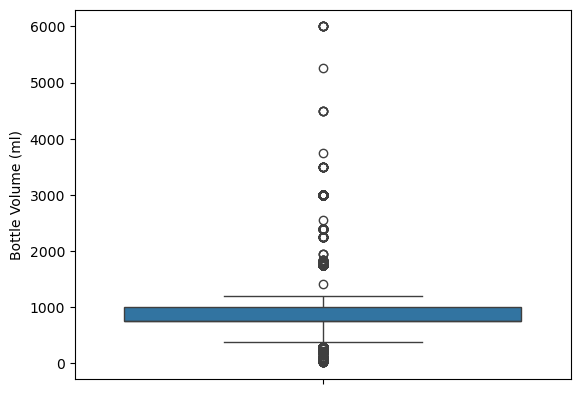

In [49]:
sns.boxplot(liquor_data['Bottle Volume (ml)'])

In [51]:
liquor_data.describe()[['Bottle Volume (ml)']]

,Bottle Volume (ml)
count,159904.000000
mean,869.592737
std,513.812818
min,20.000000
25%,750.000000
50%,750.000000
75%,1000.000000
max,6000.000000


In [66]:
print(boxplot_summary(liquor_data['Bottle Volume (ml)']),
      is_outlier(liquor_data['Bottle Volume (ml)']))

{'min': 20, 'q1': 750.0, 'median': 750.0, 'q3': 1000.0, 'max': 6000, 'lower_whisker': 375.0, 'upper_whisker': 1375.0} True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True Tr

So we can see that our function does appear to work, it returns the same min, q1, median, q3 and max as .describe() does. Our outlier detector function also seems to be correct, we see the boolean vector has a lot of trues at the start and finish of the sorted array, signifying the lowest and highest of the numbers are outliers which makes sense, and looking at the boxplot we can tell it matches as the boxplot shows a lot of outliers under and below the main body.

STOP HERE, directions say can do 4/5

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?